# Actividad 3: El Vio Bayes

El gran Viocente quiere entrar al mundo de la música popular e impulsar su banda [re:code](https://www.youtube.com/watch?v=GCN5fwrOkIw) a la estratósfera. Para esto, necesita saber exactamente qué música escuchan los *lolos*. No sólo eso, sino que saber qué música escucharon en épocas recientes. Para esto, decide dividir la década del 2010 en "Early 2010s" y "Late 2010s". Para así poder ver los cambios generados en esos años. 
Para esto, te pide ayuda en construir un predictor según el teorema de Bayes (AKA. El Vío) para ver a qué época pertenecen distintos géneros y bpms (separadas y en conjunto). De esta manera podrá recopilar la información necesaria para ser la estrella que (según él) merece ser.

# Recordatorio

Recordemos el Teorema de Bayes:

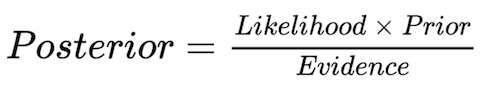

Donde:

- *Prior* es la probabilidad de la clase antes de condicionar los datos
- *Likelihood* es la probabilidad del evento dada cierta clase
- *Evidence* es la suma de las probabilidades del evento bajo todas las clases
- *Posterior* es la probabilidad del evento condicionado luego de observar los datos

### Bayes Categórico

Para encontrar las probabilidades necesarias, basta con contar las frecuencias de los casos favorables versus totales según corresponda. 


### Bayes numérico

Para este caso, es común la práctica de Bayes Gaussiano, es decir, asumiendo que la distribución de sus columnas numéricas es Gaussiana (también conocida como Normal).

En este caso, el cálculo de probabilidad se convierte en la función densidad de una distribución Normal:
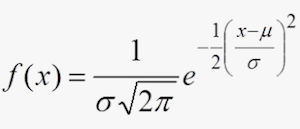




# Actividad

Para esta actividad usaremos un *dataset* sacado de Spotify, de las canciones más escuchadas entre 2010 y 2019, y mediante distintos métodos predeciremos si ciertas canciones pertenecen a la primera mitad de la década, o a la última. El *dataset* original se encuentra en [kaggle](https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year).

El archivo a cargar se llama `songs.csv`






## 1. Preprocesamiento (0.5 pts)

En esta parte solo deberás cambiar la columna `year`, de modo que los años entre 2010 y 2014 sean `Early`, y entre 2015 y 2019 sean `Late`.

In [6]:
import pandas as pd
import numpy as np


songs = pd.read_csv('songs.csv').drop('Unnamed: 0', axis=1)

In [8]:
songs['year'] = songs['year'].astype(int).apply(lambda row: 'Early' if row < 2015 else 'Late')

In [9]:
songs

,title,artist,top genre,year,bpm
0,"Hey, Soul Sister",Train,neo mellow,Early,97
1,Love The Way You Lie,Eminem,detroit hip hop,Early,87
2,TiK ToK,Kesha,dance pop,Early,120
3,Bad Romance,Lady Gaga,dance pop,Early,119
4,Just the Way You Are,Bruno Mars,pop,Early,109
...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,Late,104
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,Late,95
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,Late,136
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,Late,114


## 2. Naïve Bayes Simple (2.5 pts)
El viejo confiable.

Considera que la columna `bpm` tiene distribución Normal, con los siguientes parámetros según datos:

----
Early:

    mean: 121.44402985074628
    std: 24.375969044235916

----
Late:

    mean: 116.22686567164179
    std: 24.919917136433124

---
Early + Late:

    mean: 118.54560530679933
    std: 24.795358311133842

### 2.1 ¿Cuál es la probabilidad de que una canción sea `Early` dado que es de género `boy band`? (1 pt)

In [ ]:
# P(y|x)              = P(x|y) * P(y) / P(x)
# P(Early | boy band) = P(boy band | Early) * P(Early) / P(boy band)

# P(boy band) = P(boy band | Early) * P(Early) + P(boy band | Late) * P(Late)

In [81]:
early_count = songs[songs.year == 'Early'].shape[0]
late_count  = songs[songs.year == 'Late'].shape[0]
total_count = songs.shape[0]

In [82]:
c1 = songs[(songs['top genre'] == 'boy band') & (songs.year == 'Early')].shape[0] / early_count # P(X|y=Early)
c2 = songs[(songs['top genre'] == 'boy band') & (songs.year == 'Late')].shape[0]  / late_count  # P(X|y=Late)

In [78]:
c1 = c1 * (early_count/total_count) # P(X|y=Early)*P(y=Early)
c2 = c2 * (late_count/total_count)  # P(X|y=Late)*P(y=Late)

r1 = c1 / (c1 + c2)

In [79]:
r1

0.6

Respuesta: Probabilidad de Early dado que es de género boy band = 60%

### 2.2 ¿Cuál es la probabilidad de que una canción sea `Late` dado que tiene `143` bpm? (1.5 pts)

In [26]:
from scipy.stats import norm
# si la media fuera 143 y la std 24, calculamos la f.d.p de 125:
norm(143, 24).pdf(125)

0.012547393006450185

In [59]:
t1 = norm(116.22686567164179, 24.919917136433124).pdf(143) * (late_count/total_count)
t2 = norm(121.44402985074628, 24.375969044235916).pdf(143) * (early_count/total_count)

r2 = t1 / (t1 + t2)

In [60]:
r2

0.5037364259758386

Respuesta: Probabilidad de ser Late dado que tiene 143 bpm = 50.37%

## 3. Naïve Bayes Compuesto (2.5 pts)
This is the remix.
En esta sección deberá tomar en cuenta tanto la columna `bpm` como `top genre` para hacer sus predicciones.

### 3.1 ¿Cuál es la probabilidad de que una canción sea `Late` dado que es `barbadian pop` y tiene `132` bpm?




In [62]:
# P(y|X) = P(X|y)P(y) / P(X)
# p1  = P(bardian pop | Late)
# p2  = P(132 bpm     | Late)
# p3  = P(Late)

# p4  = P(X) = P(bardian pop) * P(132 bpm)
# p5 = P(bardian pop) = P(bardian pop | Late) * P(Late) + P(bardian pop | Early) * P(Early)
                                                  # _p1 = P(bardian pop | Early)
# p6 = P(132 bpm)     = P(132 bpm | Late) * P(Late) + P(132 bpm | Early) * P(Early)  
                                              # _p2 = P(132 bpm | Early)
    
songs['top genre'] = songs['top genre'].astype(str)

p1  = songs[(songs['top genre'] == 'barbadian pop') & (songs.year == 'Late')].shape[0] / songs[songs.year == 'Late'].shape[0]
p2  = norm(116.22686567164179, 24.919917136433124).pdf(132)
p3  = songs[songs.year == 'Late'].shape[0] / songs.shape[0]

_p1 = songs[(songs['top genre'] == 'barbadian pop') & (songs.year == 'Early')].shape[0] / songs[songs.year == 'Early'].shape[0]
p5 = p1 * (late_count / total_count) + _p1 * (early_count / total_count)

_p2 = norm(121.44402985074628, 24.375969044235916).pdf(132)
p6 =  p2 * (late_count / total_count) + _p2 * (early_count / total_count)

p4 = p5 * p6

In [63]:
r3 = (p1*p2)*p3/p4

In [64]:
r3

0.31416814795000725

Respuesta: Probabilidad de ser Late dado que es barbadian pop y 132 bpm = 31.4%

4. # Análisis
¿Se puede obtener una conclusión clara, a tu parecer, de los datos investigados? ¿Existen posibles sesgos generados por el método utilizado que generan una falta de exactitud? 
----
HINT: ¿Por qué se llama NAÏVE Bayes?

No se puede dar una conclusion clara dado que el género de la canción guarda relación con el bpm y no son eventos independientes; por lo que usar Naive Bayes (que asume independencia de eventos) conlleva a una perdida de información.